## 📊 Dataset Overview
This project uses three anonymized datasets representing real-world customer profiles, credit bureau information, and transaction patterns.

### **1️⃣ Customers Dataset**
Contains demographic and socioeconomic details:
- `cust_id`
- `name`
- `gender`
- `age`
- `location`
- `occupation`
- `annual_income`
- `marital_status`

**Purpose:**
To understand demographic segmentation, income distribution, and target audiences.

In [35]:
from src.data_loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loader = DataLoader()
customers = loader.load_table("customers")

customers.head()


customers loaded successfully. shape: (1000, 8)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [6]:
customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [7]:
customers[customers.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [9]:
customers.occupation.value_counts()

occupation
Business Owner         289
Freelancer             228
Data Scientist         184
Fullstack Developer    148
Consultant              97
Artist                  38
Accountant              16
Name: count, dtype: int64

## Handling Missing Values in `annual_income`

### Observation
The `annual_income` column contains 50 missing values (~5% of total records).
All other demographic fields are complete.

### Business Reasoning
Income is closely related to a customer’s occupation.
Different occupations have different earning distributions, so using a single global median would ignore these structural differences.

### Decision
Missing `annual_income` values will be imputed using the median income within each occupation group.

This approach preserves income structure across professions and ensures more realistic financial representation for credit eligibility analysis.


In [10]:
occupation_wise_inc_median=customers.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [13]:

customers["annual_income"] = customers.apply(
    lambda row: occupation_wise_inc_median[row["occupation"]] if pd.isnull(row["annual_income"]) else row["annual_income"],
    axis=1
)

In [14]:
customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [15]:
customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [18]:
customers[customers.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


In [19]:
customers[customers.annual_income < 100].shape

(10, 8)

## Handling Unrealistic Values in `annual_income`

### Observation
The minimum value of `annual_income` is 2, which is not economically realistic.
There are 10 customers with income less than 100.

### Business Reasoning
Such low values likely represent data entry errors and may distort credit eligibility analysis.

### Decision
Values of `annual_income` below 100 will be treated as invalid and replaced using the median income within the respective occupation group to preserve income structure.


In [20]:
customers["annual_income"] = customers.apply(
    lambda row: occupation_wise_inc_median[row["occupation"]] if row["annual_income"]<100 else row["annual_income"],
    axis=1
)

In [21]:
customers[customers.annual_income < 100].shape

(0, 8)

In [22]:
customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [23]:
customers[(customers.age < 15) | (customers.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,96522.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,55254.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,61021.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,444776.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,83045.0,Married


In [24]:
customers[(customers.age < 15) | (customers.age > 80)].shape

(20, 8)

In [25]:
occupation_age_median = customers.groupby("occupation")["age"].median()
occupation_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

## Handling Invalid Values in `age`

### Observation
The `age` column has a minimum value of 1 and a maximum value of 135, which are not realistic for credit card eligibility.

A total of 20 customers fall outside the acceptable age range.

### Business Reasoning
For credit card products, customers are typically within a reasonable working-age population.
A practical age range is considered between 15 and 80 years.

Values outside this range likely represent data entry errors.

### Decision
Ages below 15 and above 80 will be treated as invalid and replaced using the median age within the respective occupation group to maintain demographic consistency.


In [27]:
customers["age"] = customers.apply(
    lambda row: occupation_age_median[row["occupation"]]
    if (row["age"]<15) or (row["age"]>80)
    else row["age"],
    axis = 1
)

In [28]:
customers[(customers.age < 15) | (customers.age > 80)].shape

(0, 8)

## Creating Age Groups for Analysis

### Objective
To better understand customer demographics, the `age` column is grouped into meaningful age segments.

### Business Reasoning
Age plays an important role in financial behavior, credit usage, and product adoption.
Segmenting customers into age groups allows clearer analysis of:

- Spending patterns
- Income distribution
- Credit behavior
- Target market identification

### Implementation
Customers are grouped into the following categories:

- 18–25 → Early career segment
- 26–48 → Working professional segment
- 49–65 → Mature segment

This transformation supports demographic analysis and visualization.


In [30]:
bins_edge = [17, 25, 48, 65]
bin_labels =["18-25", "26-48", "49-65"]
customers["age_group"]= pd.cut(customers["age"], bins= bins_edge, labels=bin_labels)

In [31]:
customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [32]:
age_group_per_count =customers["age_group"].value_counts(normalize=True)*100
age_group_per_count

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

## Distribution of Customers by Age Group

To understand the demographic composition of customers, we analyzed the percentage distribution across defined age segments.

### Observation
- 26–48 years: 56.7%
- 18–25 years: 24.6%
- 49–65 years: 18.7%

### Insight
The majority of customers belong to the 26–48 age group, indicating a strong working-professional customer base.
This segment may represent the primary target market for the new credit card product.


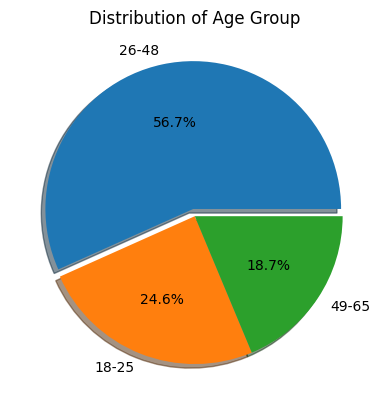

In [36]:
plt.pie(age_group_per_count,
        labels=age_group_per_count.index,
        autopct="%1.1f%%",
       shadow=True,
       explode=(0.05,0,0))
plt.title("Distribution of Age Group")
plt.show()

## Average Annual Income Across Demographic Segments

To understand how income varies across different customer segments, we analyzed the average annual income by:

- Gender
- Location
- Occupation
- Marital Status

### Objective
Identify which demographic groups demonstrate higher earning capacity, as income plays a key role in credit card eligibility and target market selection.

### Insight Purpose
This analysis helps:

- Detect high-income customer segments
- Understand financial distribution across professions and regions
- Support data-driven targeting strategy for the new credit card product


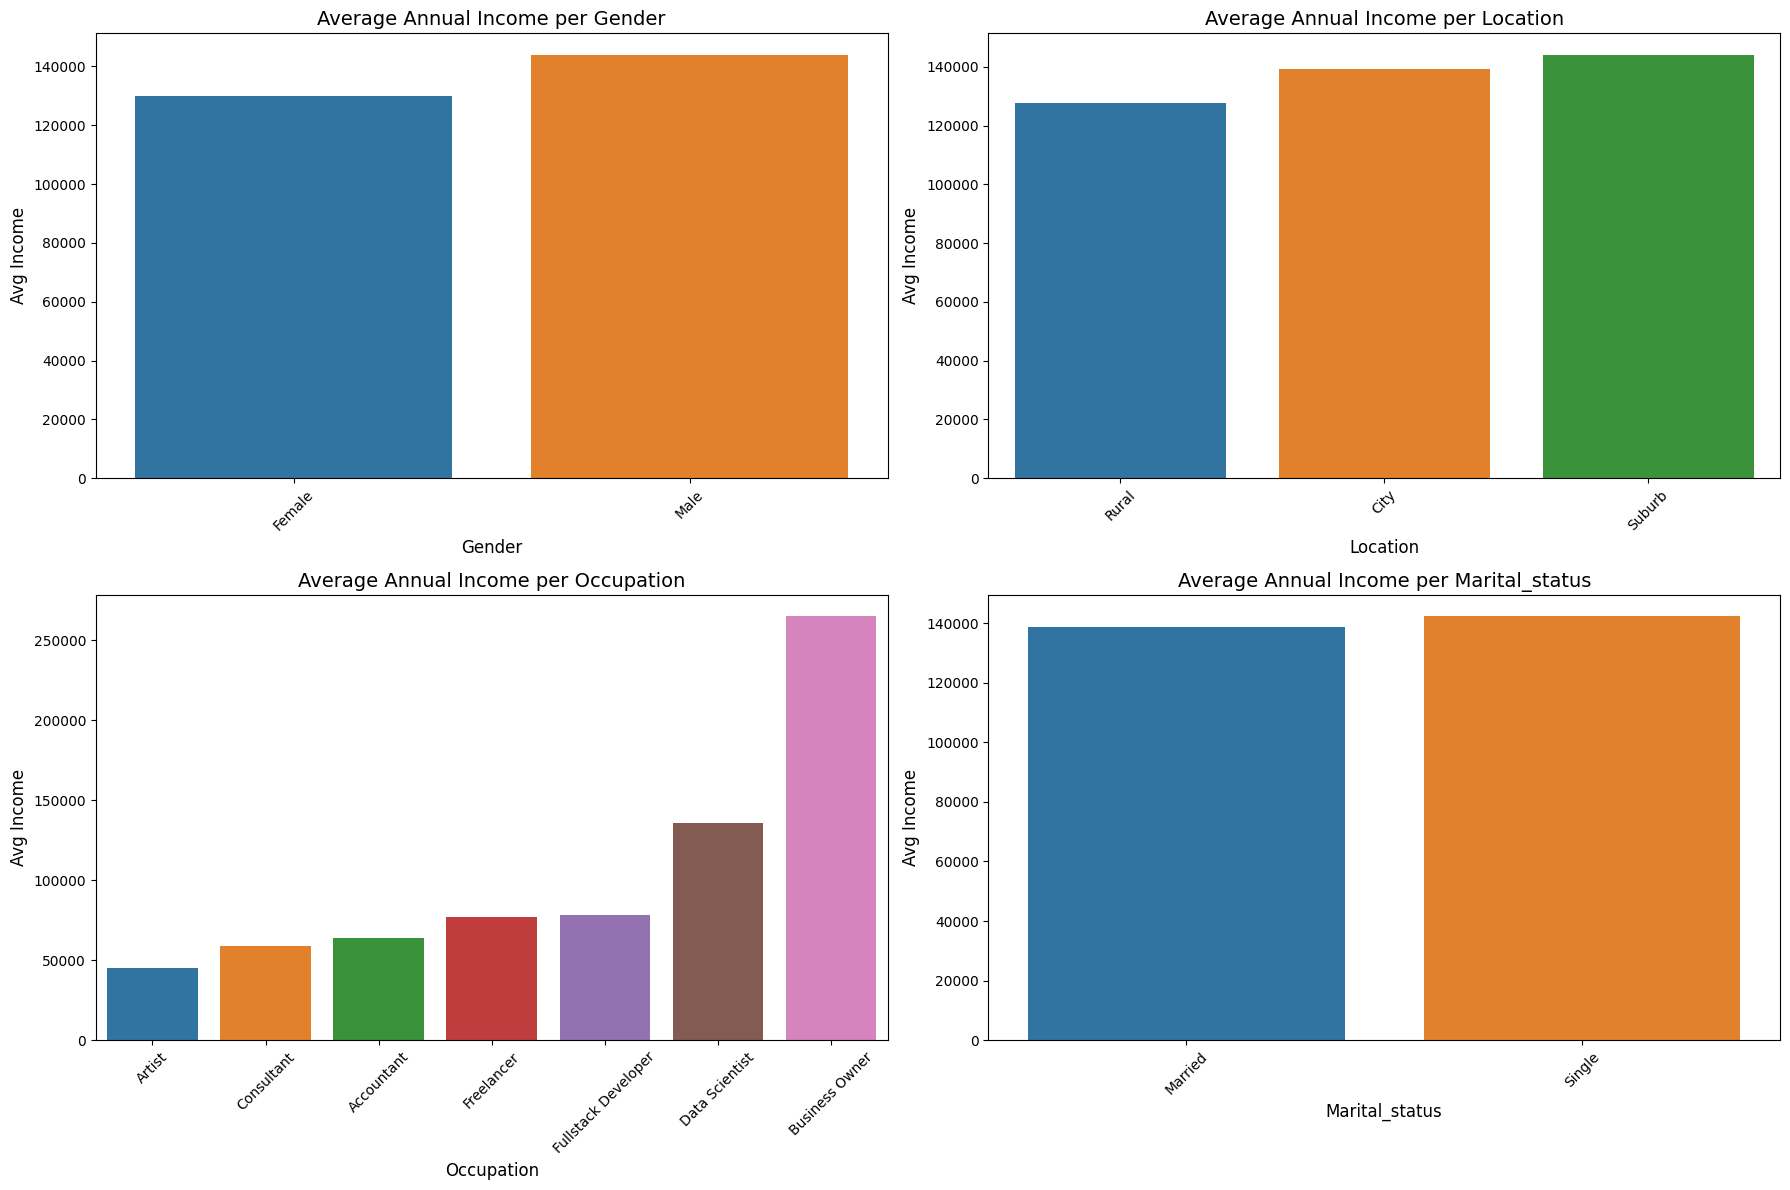

In [40]:
categorical_columns = ["gender", "location", "occupation", "marital_status"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    avg_income_per_group = customers.groupby(col)["annual_income"].mean().sort_values()

    sns.barplot(
        x=avg_income_per_group.index,
        y=avg_income_per_group.values,
        hue=avg_income_per_group.index,   # assign hue
        palette="tab10",
        legend=False,                    # remove legend duplication
        ax=axes[i]
    )

    axes[i].set_title(f"Average Annual Income per {col.capitalize()}", fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel("Avg Income", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
